# Little Endian and marginal counts

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.result import marginal_counts
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

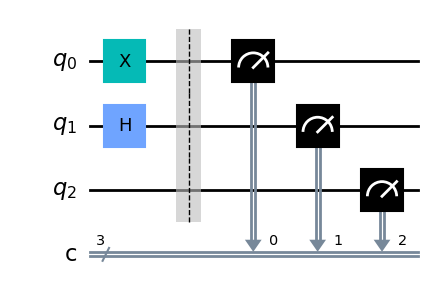

In [2]:
qr = QuantumRegister(3, name="q")
cr = ClassicalRegister(3, name="c")

qc = QuantumCircuit(qr, cr)
qc.x(qr[0])
qc.h(qr[1])
qc.barrier()
qc.measure(qr, cr)

qc.draw("mpl")

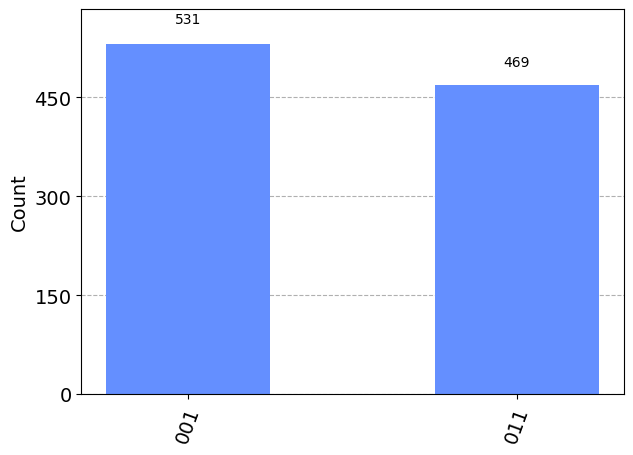

In [5]:
sim = AerSimulator()
transpiled_circuit = transpile(qc, sim)

# run job
shots = 1000
job = sim.run(transpiled_circuit, shots=shots)

# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

In [4]:
marginal_counts(exp_counts, [0])

{'1': 1000}

In [5]:
marginal_counts(exp_counts, [1])

{'1': 511, '0': 489}

In [6]:
marginal_counts(exp_counts, [2])

{'0': 1000}

# Calibration data

In [7]:
from qiskit_ibm_provider import IBMProvider

In [8]:
provider = IBMProvider()

In [9]:
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)

In [10]:
str(backend.properties().last_update_date)

'2023-06-08 15:28:26+05:30'

In [11]:
backend.properties()

In [12]:
backend.properties().gates[82]

In [13]:
backend.properties().gates

In [14]:
backend.properties().qubits[0]

[Nduv(datetime.datetime(2023, 6, 8, 13, 30, 43, tzinfo=tzlocal()), T1, us, 70.95660521418755),
 Nduv(datetime.datetime(2023, 6, 8, 11, 22, 41, tzinfo=tzlocal()), T2, us, 128.32115797019463),
 Nduv(datetime.datetime(2023, 6, 8, 15, 28, 26, tzinfo=tzlocal()), frequency, GHz, 5.1135326648681865),
 Nduv(datetime.datetime(2023, 6, 8, 15, 28, 26, tzinfo=tzlocal()), anharmonicity, GHz, -0.33523244411102265),
 Nduv(datetime.datetime(2023, 6, 8, 10, 42, 22, tzinfo=tzlocal()), readout_error, , 0.015600000000000058),
 Nduv(datetime.datetime(2023, 6, 8, 10, 42, 22, tzinfo=tzlocal()), prob_meas0_prep1, , 0.022800000000000042),
 Nduv(datetime.datetime(2023, 6, 8, 10, 42, 22, tzinfo=tzlocal()), prob_meas1_prep0, , 0.0084),
 Nduv(datetime.datetime(2023, 6, 8, 10, 42, 22, tzinfo=tzlocal()), readout_length, ns, 7111.11111111111)]

# Random

In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(3, name="q")
cr = ClassicalRegister(3, name="c")

qc = QuantumCircuit(qr, cr)
qc.x(qr[0])
qc.h(qr[1])
qc.barrier()
qc.measure(qr, cr)

In [16]:
# from qiskit.test.reference_circuits import ReferenceCircuits
# from qiskit_ibm_runtime import Sampler, Session, Options

# options = Options(optimization_level=3)

# with Session(backend="ibmq_qasm_simulator") as session:
#     sampler = Sampler(session=session, options=options)
#     job = sampler.run(qc)
#     print("Sampler job ID: {}".format(job.job_id()))
#     print("Sampler job result: {}".format(job.result()))

#     print('blah blah blah')

#     job2 = sampler.run(qc)
#     print("Sampler job ID: {}".format(job2.job_id()))
#     print("Sampler job result: {}".format(job2.result()))

#     job3 = sampler.run(qc)
#     print("Sampler job ID: {}".format(job3.job_id()))
#     print("Sampler job result: {}".format(job3.result()))
#     # Close the session only if all jobs are finished and
#     # you don't need to run more in the session.
#     session.close()

In [17]:
# from qiskit import execute

# aa = QuantumCircuit(1,1)
# aa.x(0)
# aa.measure(0,0)
# backend = provider.get_backend('ibmq_jakarta')
# #backend = Aer.get_backend('qasm_simulator')
# result_job = execute(aa,backend = backend,shots = 10000)

In [18]:
qr1 = QuantumRegister(3)
qr2 = QuantumRegister(5)

qrs = [qr1, qr2]

In [19]:
qrs

[QuantumRegister(3, 'q4'), QuantumRegister(5, 'q5')]

In [20]:
qc = QuantumCircuit(qr1, qr2)

In [21]:
qc.qregs

[QuantumRegister(3, 'q4'), QuantumRegister(5, 'q5')]

# Get CX duration in dt - Guadalupe

In [1]:
from qiskit_ibm_provider import IBMProvider
from scipy import stats

In [2]:
provider = IBMProvider()
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)

In [3]:
props = backend.properties()

In [4]:
gates = props.gates

In [5]:
gates[0]

In [6]:
cx_gates = [g for g in gates if g.gate=='cx']

In [7]:
props.gate_length('cx', (5, 8))

2.702222222222222e-07

In [8]:
cx_durations = []

for ctrl_qubit in range(16):
    for target_qubit in backend.coupling_map.neighbors(ctrl_qubit):
        cx_len = props.gate_length('cx', (ctrl_qubit, target_qubit))
        cx_durations.append(cx_len)


In [9]:
stats.describe(cx_durations)

DescribeResult(nobs=32, minmax=(2.6311111111111107e-07, 7.751111111111111e-07), mean=4.2266666666666664e-07, variance=1.6804651533253684e-14, skewness=1.1105738562331184, kurtosis=0.7157601673432179)

In [31]:
victim_qubits = (5, 8, 11, 14)
cx_durations = []

for ctrl_qubit in victim_qubits:
    neighbours = backend.coupling_map.neighbors(ctrl_qubit)
    neighbours2 = [n for n in neighbours if n in victim_qubits]
    for target_qubit in neighbours2:
        cx_len = props.gate_length('cx', (ctrl_qubit, target_qubit))
        cx_durations.append(cx_len)


In [32]:
cx_durations

[2.702222222222222e-07,
 3.484444444444444e-07,
 3.0577777777777775e-07,
 3.484444444444444e-07,
 3.1288888888888885e-07,
 3.84e-07]

In [10]:
stats.describe(cx_durations)

DescribeResult(nobs=32, minmax=(2.6311111111111107e-07, 7.751111111111111e-07), mean=4.2266666666666664e-07, variance=1.6804651533253684e-14, skewness=1.1105738562331184, kurtosis=0.7157601673432179)

In [11]:
# backend.coupling_map.distance_matrix

In [12]:
from qiskit import QuantumCircuit

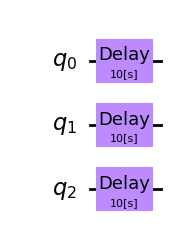

In [13]:
qc = QuantumCircuit(3)
qc.delay(duration=10, unit='s')
qc.draw('mpl')

In [14]:
3.84e-07*5

1.92e-06

Since we want our window to be wide enough to capture upto 5 CNOTs we can set a delay of 2e-06 for Guadalupe

In [15]:
3.84e-07*3

1.152e-06

In [16]:
config = backend.configuration()

In [17]:
config.dt

2.2222222222222221e-10

In [18]:
1.92e-06/config.dt

8640.0

In [19]:
1.152e-06/config.dt

5184.0

In [20]:
7.751111111111111e-07/config.dt

3488.0

In [21]:
4.2266666666666664e-07/config.dt

1902.0